problem1

In [75]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram

In [76]:
# Step 2: Load Dataset
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model_year', 'origin', 'car_name']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

df = pd.read_csv(url, sep=r'\s+', names=column_names, na_values='?',index_col=False)

In [77]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [79]:
# Step 3: Select continuous features: only feature with float data types are considered
continuous_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
df_cont = df[continuous_cols]

In [80]:
df_cont.head()

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5


In [81]:
# Step 4: Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df_cont_imputed = pd.DataFrame(imputer.fit_transform(df_cont), columns=continuous_cols)

In [82]:
# Perform Hierarchical Clustering
clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
clusters = clustering.fit_predict(df_cont_imputed)

In [83]:
# Add cluster labels to dataframe
df_cont_imputed['clusters']=clusters

In [84]:
# Display first few rows of the clustered dataframe
print(df_cont_imputed.head())

    mpg  displacement  horsepower  weight  acceleration  clusters
0  18.0         307.0       130.0  3504.0          12.0         2
1  15.0         350.0       165.0  3693.0          11.5         2
2  18.0         318.0       150.0  3436.0          11.0         2
3  16.0         304.0       150.0  3433.0          12.0         2
4  17.0         302.0       140.0  3449.0          10.5         2


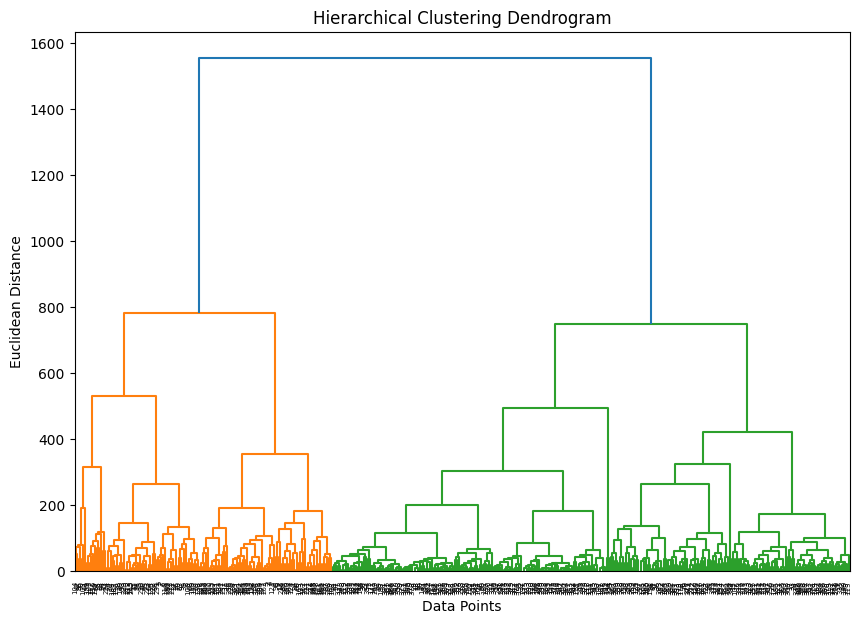

In [85]:
# Plot dendrogram
plt.figure(figsize=(10, 7))

# use SciPy linkage 
Z = linkage(df_cont_imputed, method='average',metric='euclidean')

dendrogram(Z, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [86]:
# Calculate mean and variance for each cluster
cluster_stats = df_cont_imputed.groupby('clusters')[continuous_cols].agg(['mean', 'var'])
print("Cluster statistics:")
print(cluster_stats.T)
print("\n")

Cluster statistics:
clusters                       0             1             2
mpg          mean      27.365414     13.889062     17.510294
             var       41.976309      3.359085      8.829892
displacement mean     131.934211    358.093750    278.985294
             var     2828.083391   2138.213294   2882.492318
horsepower   mean      84.300061    167.046875    124.470588
             var      369.143491    756.521577    713.088674
weight       mean    2459.511278   4398.593750   3624.838235
             var   182632.099872  74312.340278  37775.809263
acceleration mean      16.298120     13.025000     15.105882
             var        5.718298      3.591429     10.556980




In [87]:
# Add origin to the imputed dataframe for comparison
df_cont_imputed['origin'] = df['origin']

In [88]:
# Calculate mean and variance for each origin class
origin_stats = df_cont_imputed.groupby('origin')[continuous_cols].agg(['mean', 'var'])
print("Origin class statistics:")
print(origin_stats.T)
print("\n")

Origin class statistics:
origin                         1              2              3
mpg          mean      20.083534      27.891429      30.450633
             var       40.997026      45.211230      37.088685
displacement mean     245.901606     109.142857     102.708861
             var     9702.612255     509.950311     535.465433
horsepower   mean     118.814769      81.241983      79.835443
             var     1569.532304     410.659789     317.523856
weight       mean    3361.931727    2423.300000    2221.227848
             var   631695.128385  240142.328986  102718.485881
acceleration mean      15.033735      16.787143      16.172152
             var        7.568615       9.276209       3.821779




In [89]:
# Compare cluster assignments with origin labels
comparison = pd.crosstab(df_cont_imputed['clusters'], df_cont_imputed['origin'])
print("Cluster vs Origin label comparison:")
print(comparison)

Cluster vs Origin label comparison:
origin      1   2   3
clusters             
0         120  67  79
1          64   0   0
2          65   3   0


In [90]:
# Calculate adjusted Rand index to quantify the relationship
ari = adjusted_rand_score(df_cont_imputed['origin'], df_cont_imputed['clusters'])
print(f"\nAdjusted Rand Index: {ari:.3f}")


Adjusted Rand Index: -0.085


Problem2

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Load the dataset
df = pd.read_csv('boston.csv')
print(df.head())

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio       b  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  


In [46]:
#Separate features and target
X = df.drop('medv', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

For n_clusters = 2, Silhouette Score: 0.358
For n_clusters = 3, Silhouette Score: 0.245
For n_clusters = 4, Silhouette Score: 0.243
For n_clusters = 5, Silhouette Score: 0.235
For n_clusters = 6, Silhouette Score: 0.237


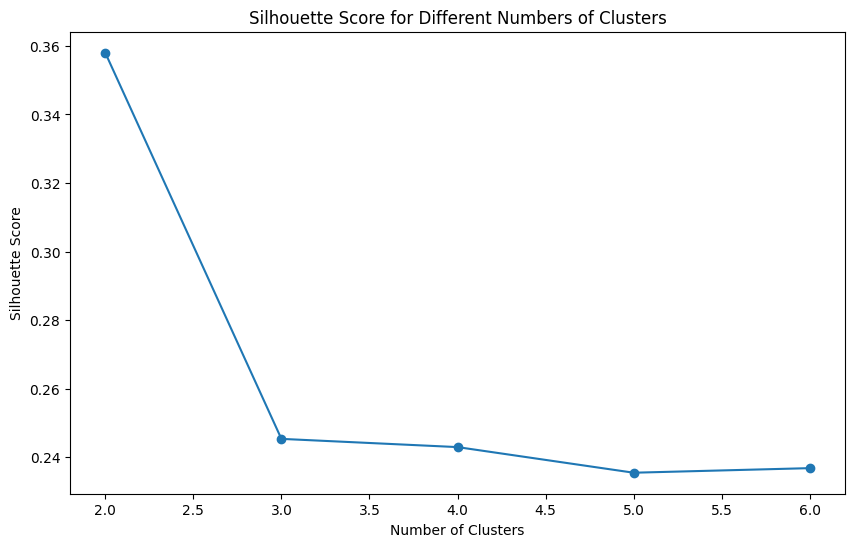

In [47]:
#Range of cluster numbers to test
cluster_range = range(2, 7)
silhouette_scores = []
# Perform K-Means for each cluster number and calculate Silhouette score
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, Silhouette Score: {silhouette_avg:.3f}")

# Plot Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

In [48]:
# Determine the optimal number of clusters based on the highest Silhouette score
best_n_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {best_n_clusters}")

Optimal number of clusters: 2


         Unnamed: 0       crim         zn      indus      chas       nox  \
Cluster                                                                    
0        193.620896   0.287682  17.164179   7.178179  0.068657  0.489041   
1        370.807018  10.129061   0.000000  18.891930  0.070175  0.683316   

               rm        age       dis        rad         tax    ptratio  \
Cluster                                                                    
0        6.448764  57.049552  4.710233   4.459701  302.480597  17.794030   
1        5.963094  91.153801  2.002125  19.520468  615.421053  19.751462   

                  b      lstat       medv  
Cluster                                    
0        384.797612   9.519254  25.672836  
1        301.578129  18.792398  16.381287  


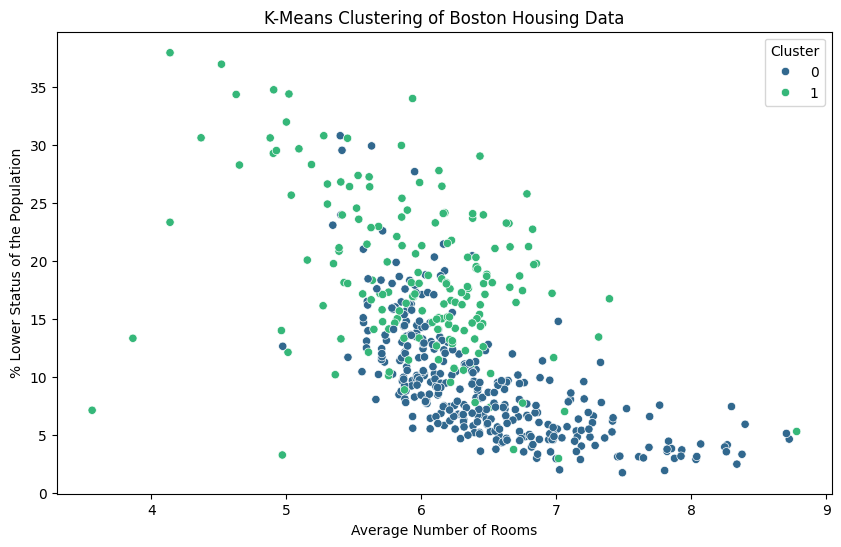

In [49]:
# Perform K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster assignments to the DataFrame
df['Cluster'] = clusters

# Calculate mean values for each feature in each cluster
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rm', y='lstat', hue='Cluster', data=df, palette='viridis')
plt.xlabel('Average Number of Rooms')
plt.ylabel('% Lower Status of the Population')
plt.title('K-Means Clustering of Boston Housing Data')
plt.show()

In [50]:
# Get the centroids (mean of each feature in each cluster from K-Means)
centroids = pd.DataFrame(kmeans_best.cluster_centers_, columns=X.columns)
print(centroids)

   Unnamed: 0      crim        zn     indus      chas       nox        rm  \
0   -0.409936 -0.387039  0.248957 -0.577597 -0.002023 -0.567142  0.233829   
1    0.803091  0.758234 -0.487722  1.131549  0.003963  1.111068 -0.458086   

        age       dis       rad       tax   ptratio         b     lstat  
0 -0.409848  0.435053 -0.585114 -0.628118 -0.305855  0.308357 -0.439278  
1  0.802919 -0.852298  1.146277  1.230524  0.599189 -0.604091  0.860574  


In [51]:
# Compare cluster means from the DataFrame with centroids from K-Means
comparison = pd.concat([cluster_means, centroids], axis=1, keys=['Cluster Means', 'Centroids'])

print("Comparison of Cluster Means and Centroids:")
print(comparison)

Comparison of Cluster Means and Centroids:
  Cluster Means                                                       \
     Unnamed: 0       crim         zn      indus      chas       nox   
0    193.620896   0.287682  17.164179   7.178179  0.068657  0.489041   
1    370.807018  10.129061   0.000000  18.891930  0.070175  0.683316   

                                             ... Centroids            \
         rm        age       dis        rad  ...      chas       nox   
0  6.448764  57.049552  4.710233   4.459701  ... -0.002023 -0.567142   
1  5.963094  91.153801  2.002125  19.520468  ...  0.003963  1.111068   

                                                                         \
         rm       age       dis       rad       tax   ptratio         b   
0  0.233829 -0.409848  0.435053 -0.585114 -0.628118 -0.305855  0.308357   
1 -0.458086  0.802919 -0.852298  1.146277  1.230524  0.599189 -0.604091   

             
      lstat  
0 -0.439278  
1  0.860574  

[2 rows x 29 columns]

problem 3

In [63]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import homogeneity_score, completeness_score

In [66]:
#Load the dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# add target（wine target）
df['target'] = wine.target

print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [67]:
# Separate features and target
X = df.drop('target', axis=1)
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
# set the number of clusters to 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
# Add the clustering results to the original data frame.
df['cluster'] = clusters
# Display the mean value of each cluster.
print(df.groupby('cluster').mean())

           alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
cluster                                                                   
0        12.250923    1.897385  2.231231          20.063077   92.738462   
1        13.134118    3.307255  2.417647          21.241176   98.666667   
2        13.676774    1.997903  2.466290          17.462903  107.967742   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         color_intensity       hue  od280/od315_of_diluted_wines      proline  \
cluster                                                                         
0               2.973077  1.062708                      2.803385   510.16923

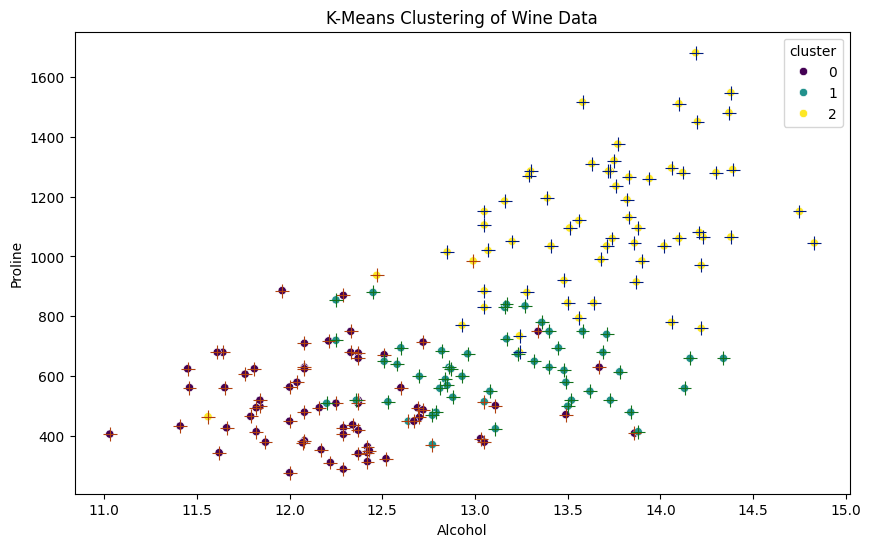

In [70]:
# Select two features for visualization.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='proline', hue='cluster', data=df, palette='viridis')

# Add the actual class labels as the second layer for comparison. 
sns.scatterplot(x='alcohol', y='proline', hue='target', data=df, palette='dark', marker='+', s=100, legend=False)

plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.title('K-Means Clustering of Wine Data')
plt.show()

In [72]:
# Calculate the homogeneity and completeness.
homogeneity = homogeneity_score(df['target'], df['cluster'])
completeness = completeness_score(df['target'], df['cluster'])

print(f"Homogeneity Score: {homogeneity:.3f}")
print(f"Completeness Score: {completeness:.3f}")

Homogeneity Score: 0.879
Completeness Score: 0.873
